# Premiere page

In [2]:
pip install requests beautifulsoup4 pandas matplotlib

     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------------- 59.7/59.7 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.5 MB 3.6 MB/s eta 0:00:04
   - -------------------------------------- 0.3/11.5 MB 3.8 MB/s eta 0:00:03
   - -------------------------------------- 0.5/11.5 MB 3.8 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/11.5 MB 3.8 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/11.5 MB 3.7 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/11.5 MB 3.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/11.5 MB 3.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.5 MB 3.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/11.5 MB 3.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.7/11.5 MB 3.7 MB/s eta 0:00:03
   -----

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://books.toscrape.com/"
response = requests.get(url)
html_content = response.text

soup = BeautifulSoup(html_content, 'html.parser')

soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

In [4]:
dict = {'Title': [], 'Price': [], 'Rating': []}

for book in soup.find_all('article', class_='product_pod'):
    title = book.h3.a['title']
    dict['Title'].append(title)
    
    price = book.find('p', class_='price_color').text
    price = price.replace('£', '').strip()  
    #Cette ligne permet d'ignore le ' Â'
    price = price.encode('ascii', 'ignore').decode('ascii')  
    dict['Price'].append(float(price))

    note = book.p['class'][1]  
    notes = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
    dict['Rating'].append(notes[note])

df = pd.DataFrame(dict)
df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


# Toutes les pages

In [5]:
all_dict = {'Title': [], 'Price': [], 'Rating': []}

for page in range(1, 51):
    url = f"https://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    for book in soup.find_all('article', class_='product_pod'):
        title = book.h3.a['title']
        all_dict['Title'].append(title)
        
        price = book.find('p', class_='price_color').text
        price = price.replace('£', '').strip()  
        price = price.encode('ascii', 'ignore').decode('ascii') 
        all_dict['Price'].append(float(price)) 
            
        rating_class = book.p['class'][1]
        ratings = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
        all_dict['Rating'].append(ratings[rating_class])

all_df = pd.DataFrame(all_dict)
all_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,4
997,A Spy's Devotion (The Regency Spies of London #1),16.97,5
998,1st to Die (Women's Murder Club #1),53.98,1


# VIZ

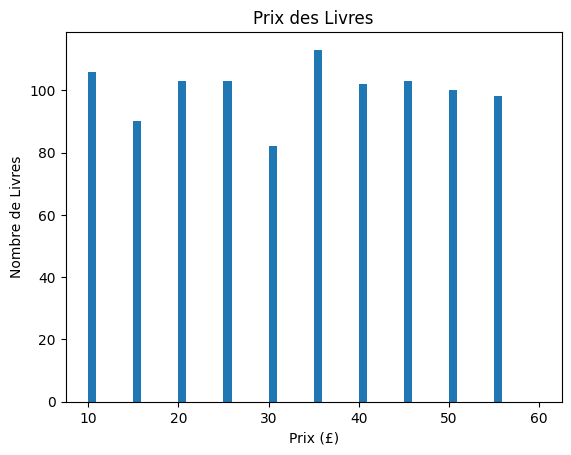

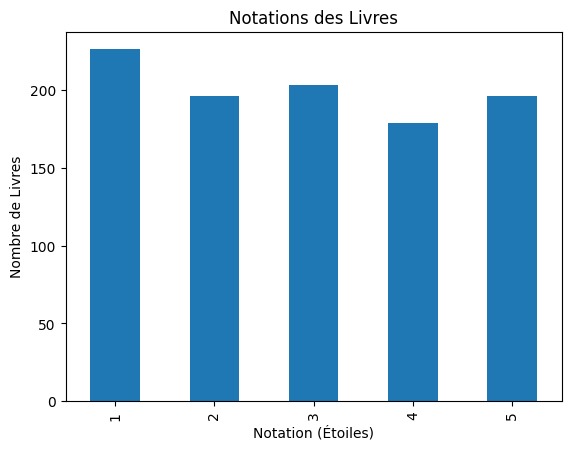

In [14]:
import matplotlib.pyplot as plt

all_df['Price'].plot(kind='hist', bins=10, title='Prix des Livres', width=0.9)
plt.xlabel('Prix (£)')
plt.ylabel('Nombre de Livres')
plt.show()

all_df['Rating'].value_counts().sort_index().plot(kind='bar', title='Notations des Livres')
plt.xlabel('Notation (Étoiles)')
plt.ylabel('Nombre de Livres')
plt.show()
